# Load packages and dependencies

In [1]:
import os
import json
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from google.colab import drive
import seaborn as sns
import librosa
from sklearn.metrics import confusion_matrix
import IPython.display as display

# Connect the drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the raw data

In [3]:
DATASET_PATH = "/content/drive/My Drive/dataset/luganda_data_set"
JSON_PATH = "/content/drive/My Drive/Colab Notebooks/data.json"
SAMPLE_RATE = 2205
AUDIO_DURATION = 3  # measured in seconds
SAMPLES_PER_AUDIO = SAMPLE_RATE * AUDIO_DURATION

# Preprocess the data

In [4]:
def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_AUDIO / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all sub-folders
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing the sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("/")[-1]
            data["mapping"].append(semantic_label)
            print(f"\nProcessing: {semantic_label}")

            # process all audio files in genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for the current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish],
                                                sr=sample_rate,
                                                n_mfcc=num_mfcc,
                                                n_fft=n_fft,
                                                hop_length=hop_length)

                    mfcc = mfcc.T

                    # store only mfcc feature with the expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print(f"{file_path}, segment:{d+1}")

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

    # return the data dictionary
    return data






## Save the mfcc data

In [5]:
data = save_mfcc(DATASET_PATH, JSON_PATH, num_segments=6)


Processing: mu masso


/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1102
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-5.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-12.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-14.wav, segment:2
/content/d

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=529
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=881
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-23.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-29.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-36.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-36.wav, segment:2
/con

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=132
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=616
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1057
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=749
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-81.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-88.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-88.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-88.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-95.wav, segment:5
/con

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=220
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=309
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=660
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=396
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1058
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=837
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-131.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-137.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-143.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-143.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-143.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-149.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-149.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-149.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=838
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=439
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=352
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1014
  warnings.warn(



/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-159.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-159.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-165.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-172.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-172.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-172.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-172.wav, s

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=440
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=44
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=484
  warnings.warn(



/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-199.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-199.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-199.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-199.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-199.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-203.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-203.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-203.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-203.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-209.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-209.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-209.wav, s

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=750
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=661
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1101
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-300.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-300.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-300.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-306.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-306.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-306.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-306.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-306.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-311.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-311.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-311.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-311.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=43
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=88
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=617
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-407.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-407.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-407.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-407.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-412.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-416.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=705
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=970
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-433.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-433.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-433.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-433.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-442.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-442.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-442.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-442.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-446.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-446.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-446.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-446.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=397
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-493.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-493.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-493.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-493.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-498.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-498.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-498.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-498.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-498.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-498.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-509.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-509.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=793
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-529.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-530.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-539.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-539.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=926
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=485
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-568.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-568.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-568.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-572.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-572.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-572.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-572.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-583.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-583.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-583.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-583.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-584.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=925
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=176
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=264
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-662.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-662.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-662.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-663.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-664.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-664.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-664.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-665.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1013
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=308
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-682.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-682.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-682.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-683.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-683.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-683.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-683.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-683.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-699.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-699.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-699.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-699.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=572
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-769.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-775.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-775.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-775.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-775.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-780.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-780.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-780.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-780.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-780.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-784.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Record-784.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=663
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=222
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_97.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_97.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_97.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_41.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_41.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_41.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_23.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_23.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_23.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_23.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_23.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu ma

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=223
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=443
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=664
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_114.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_114.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_114.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_114.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_9.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_9.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_9.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_9.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_9.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_149.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/mu masso/Recording_149.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/mu m

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=3
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=884
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-6.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-6.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-6.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-15.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-15.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-15.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-15.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-24.wav, segment:5
/content/drive/My D

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=573
  warnings.warn(



/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-124.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-124.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-132.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-132.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-132.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-138.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-144.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-144.wav, segment:2
/co

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=219
  warnings.warn(



/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-540.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-540.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-540.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-540.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-545.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-545.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-545.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-545.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-545.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-550.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-550.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Record-550.wav, segment:3
/co

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=444
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=2
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_50.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_50.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_50.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_50.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_13.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_13.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_13.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_13.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_138.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_138.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recording_138.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/emabega/Recor

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=880
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-546.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-546.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-560.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-560.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-560.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-565.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-565.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-565.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-590.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-590.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-590.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-590.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=131
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-610.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-610.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-610.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-630.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-630.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-630.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-630.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-630.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-631.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-631.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-631.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Record-631.wav, se

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=442
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_128.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_128.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_128.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_128.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_154.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_154.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_154.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_154.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_154.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_32.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_32.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=883
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_101.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_101.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_24.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_127.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_127.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/yimirira/Recording_127.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=792
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-91.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-98.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-98.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-98.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-98.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-98.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-113.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-113.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-119.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-119.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-119.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-126.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_s

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=969
  warnings.warn(



/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-288.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-288.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-293.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-293.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-293.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-293.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-299.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-299.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-299.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-299.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-304.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Record-304.wav, segment:2
/content/drive/My Drive/dataset/luganda

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=885
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_70.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_70.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_63.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_80.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_80.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_80.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_89.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/ddyo/Recording_89.wav, segment:2
/content/drive/M

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=704
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-90.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-90.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-90.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-97.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-97.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-97.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-97.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-97.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-97.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-112.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-112.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-118.wav, segment:1
/content/drive/My Drive/dataset/lugan

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=836
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=351
  warnings.warn(


/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-846.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-846.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:4
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:5
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-861.wav, segment:6
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-862.wav, segment:1
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-862.wav, segment:2
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-862.wav, segment:3
/content/drive/My Drive/dataset/luganda_data_set/kkono/Record-862.wav, segment:4
/content/drive/My Drive/data

## Load json file

In [6]:
def load_data(data):

    # convert lists to numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])

    print("Data successfully loaded!")

    return X, y


In [7]:
X, y = load_data(data)

Data successfully loaded!


# Split Data into Training and Testing Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Build a Neural Network Model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

## Compile the model

In [10]:
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 39)                0         
                                                                 
 dense (Dense)               (None, 512)               20480     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0

# Train the Model

In [11]:
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    batch_size=32,
                    epochs=50)

Epoch 1/50
83/83 [==============================] - 7s 8ms/step - loss: 15.8968 - accuracy: 0.1399 - val_loss: 3.7169 - val_accuracy: 0.2304
Epoch 2/50
83/83 [==============================] - 0s 6ms/step - loss: 7.3220 - accuracy: 0.1411 - val_loss: 2.6423 - val_accuracy: 0.1944
Epoch 3/50
83/83 [==============================] - 0s 5ms/step - loss: 4.8286 - accuracy: 0.1316 - val_loss: 2.7741 - val_accuracy: 0.2005
Epoch 4/50
83/83 [==============================] - 0s 5ms/step - loss: 3.8383 - accuracy: 0.1403 - val_loss: 2.7809 - val_accuracy: 0.1979
Epoch 5/50
83/83 [==============================] - 0s 5ms/step - loss: 3.4138 - accuracy: 0.1494 - val_loss: 2.7773 - val_accuracy: 0.2084
Epoch 6/50
83/83 [==============================] - 1s 7ms/step - loss: 3.1937 - accuracy: 0.1667 - val_loss: 2.7712 - val_accuracy: 0.2058
Epoch 7/50
83/83 [==============================] - 1s 7ms/step - loss: 3.0449 - accuracy: 0.1652 - val_loss: 2.7636 - val_accuracy: 0.2049
Epoch 8/50
83/83 [=

## History

In [12]:
def plot_history(history):

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

## Plot history

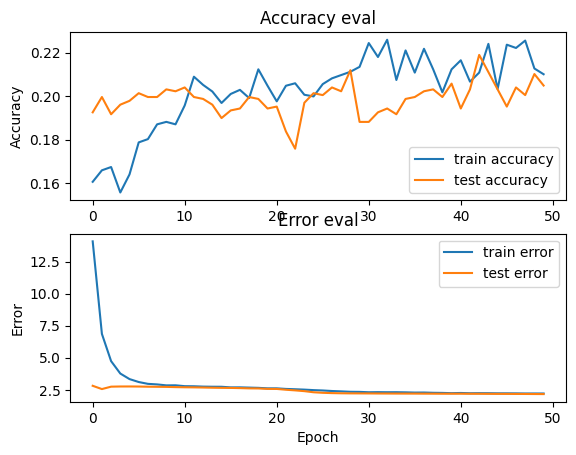

In [ ]:
plot_history(history)

# Evaluate the Model

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}')
print(f'\nTest loss: {test_loss}')

36/36 - 0s - loss: 2.1757 - accuracy: 0.2084 - 81ms/epoch - 2ms/step

Test accuracy: 0.2084432691335678

Test loss: 2.1757421493530273


# Make Predictions

In [ ]:
predictions = model.predict(X_test)

36/36 [==============================] - 0s 2ms/step


# Post-Processing and Analysis

# Save and Export Model

In [ ]:
model.save('audio_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
